# Assignement 2 study of Master data from IS Academia

In [311]:
import pandas as pd
import scipy.stats as stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

## Import Master data

Reading the pickle with the master data frame

In [312]:
master_df = pd.read_pickle("master")
master_df.head()

Civilité  Orientation Bachelor  \
Year      Semester          Sciper                                   
2016-2017 Master semestre 1 271331  Monsieur                   NaN   
                            273101  Monsieur                   NaN   
                            267543  Monsieur                   NaN   
                            202293  Monsieur                   NaN   
                            228219  Monsieur                   NaN   

                                    Orientation Master  \
Year      Semester          Sciper                       
2016-2017 Master semestre 1 271331                 NaN   
                            273101                 NaN   
                            267543                 NaN   
                            202293                 NaN   
                            228219                 NaN   

                                             Spécialisation  Filière opt.  \
Year      Semester          Sciper                                          
2016-2017 Master semestre 1 271331                      NaN           NaN   
                            273101                      NaN           NaN   
                            267543                      NaN           NaN   
                            202293                      NaN           NaN   
                            228219  Foundations of Software           NaN   

                                   Mineur   Statut Type Echange Ecole Echange  
Year      Semester          Sciper                                             
2016-2017 Master semestre 1 271331    NaN  Présent          NaN           NaN  
                            273101    NaN  Présent          NaN           NaN  
                            267543    NaN  Présent          NaN           NaN  
                            202293    NaN  Présent          NaN           NaN  
                            228219    NaN  Présent          NaN           NaN

In [313]:
s1 = master_df.xs('Master semestre 1', level=1)
s1 = s1[(s1.Statut == 'Présent') & (s1.index.get_level_values(0) != '2016-2017')].reset_index(0)
print("number of students who started their semester since 2007 :", s1.shape[0])

sem2 = master_df.xs('Master semestre 2', level=1).loc[:,['Spécialisation', 'Mineur', 'Statut']].fillna("nan")
ma90 = master_df.xs('Master semestre 2', level=1)[sem2['Mineur'].str.contains("nan") & sem2['Spécialisation'].str.contains("nan")]
ma90 = sem2[(sem2.Statut == "Présent") & (sem2.index.get_level_values(0) != '2016-2017')].reset_index(0).index.drop_duplicates()
print("number of student ending the master with 90 cr :", ma90.shape[0])

sem3 = master_df.xs('Master semestre 3', level=1)
ma120 = sem3[(sem3.Statut == "Présent") & (sem3.index.get_level_values(0) != '2016-2017')].reset_index(0).index.drop_duplicates()
print("number of student ending the master with 120 cr or who did a 3rd semester :", ma120.shape[0])

master_sciper = s1.ix[s1.index & (ma90 | ma120)].index
print("number of student who finished their masters who started in 2007 : ", master_sciper.shape[0])

master_s1_papp = master_df.loc[master_df.index.get_level_values("Sciper").isin(master_sciper.values)]

number of students who started their semester since 2007 : 767
number of student ending the master with 90 cr : 771
number of student ending the master with 120 cr or who did a 3rd semester : 441
number of student who finished their masters who started in 2007 :  784


In [314]:
master_s1_papp.head()

Civilité  Orientation Bachelor  \
Year      Semester          Sciper                                   
2016-2017 Master semestre 1 194836    Madame                   NaN   
                            254805  Monsieur                   NaN   
                            201568  Monsieur                   NaN   
                            248447    Madame                   NaN   
                            196034  Monsieur                   NaN   

                                    Orientation Master Spécialisation  \
Year      Semester          Sciper                                      
2016-2017 Master semestre 1 194836                 NaN            NaN   
                            254805                 NaN            NaN   
                            201568                 NaN            NaN   
                            248447                 NaN            NaN   
                            196034                 NaN            NaN   

                                    Filière opt. Mineur   Statut Type Echange  \
Year      Semester          Sciper                                              
2016-2017 Master semestre 1 194836           NaN    NaN  Présent          NaN   
                            254805           NaN    NaN  Présent          NaN   
                            201568           NaN    NaN  Présent          NaN   
                            248447           NaN    NaN  Présent          NaN   
                            196034           NaN    NaN  Présent          NaN   

                                   Ecole Echange  
Year      Semester          Sciper                
2016-2017 Master semestre 1 194836           NaN  
                            254805           NaN  
                            201568           NaN  
                            248447           NaN  
                            196034           NaN

In [315]:
master_semesters = []
scipers = master_s1_papp.index.get_level_values(2).drop_duplicates()

for sciper in scipers:
    student = master_s1_papp.xs(sciper, level=2)
    num_sems = student['Statut'].count() + 1
    civ = student['Civilité'][0]
    spec = student['Spécialisation'][0]
    mineur = student['Mineur'][0]
    # If the student has neither a minor nor a spec, we write him as in no spé
    if str(mineur) == "nan" and str(spec) == "nan":
        spec = "aucun"
    
    master_semesters.append([sciper, civ, num_sems, mineur, spec])

master_semesters = pd.DataFrame(master_semesters,columns=['Sciper', 'Civilité', 'Number of semesters', 'Mineur', 'Spécialisation'])

In [316]:
master_semesters

,Sciper,Civilité,Number of semesters,Mineur,Spécialisation
0,194836,Madame,4,NaN,aucun
1,254805,Monsieur,4,NaN,aucun
2,201568,Monsieur,4,NaN,aucun
3,248447,Madame,6,NaN,aucun
4,196034,Monsieur,4,NaN,aucun
5,259745,Madame,4,NaN,aucun
6,214573,Monsieur,4,NaN,Data Analytics
7,251253,Madame,4,NaN,aucun
8,225654,Madame,4,NaN,Internet Information Systems
9,257825,Monsieur,4,NaN,aucun


In [317]:
spec_count = master_semesters.groupby('Spécialisation')['Spécialisation'].count()
sems_mean_spec = master_semesters.groupby('Spécialisation')['Number of semesters'].mean()
minor_count = master_semesters.groupby('Mineur')['Mineur'].count()
sems_mean_minor = master_semesters.groupby('Mineur')['Number of semesters'].mean()
sems_stats_spec = pd.concat([spec_count,sems_mean_spec], axis=1, keys=['Count','Mean number of semesters'])
sems_stats_minor = pd.concat([minor_count,sems_mean_minor], axis=1, keys=['Count','Mean number of semesters'])
sems_stats_tot = pd.concat([sems_stats_minor, sems_stats_spec], axis=0, keys=['mineur', 'spécialisation'])
print(master_semesters.median())
sems_stats_tot

Sciper                 201600.0
Number of semesters         4.0
dtype: float64


Count  \
mineur         Area and Cultural Studies minor                         3   
               Information security minor                             12   
               Mineur en Biocomputing                                  7   
               Mineur en Etudes asiatiques contemporaines              1   
               Mineur en Ingénierie financière                         6   
               Mineur en Management, technologie et entreprene...     32   
               Mineur en Mathématiques                                 2   
               Mineur en Microtechnique                                1   
               Mineur en Neuroprosthétiques                            1   
               Mineur en Neurosciences computationnelles               2   
               Mineur en Technologies spatiales                        2   
spécialisation Biocomputing                                            3   
               Computer Engineering - SP                              18   
               Computer Science Theory                                 1   
               Data Analytics                                          5   
               Foundations of Software                                56   
               Information Security - SP                               7   
               Internet Information Systems                            1   
               Internet computing                                     81   
               Service science                                         3   
               Signals, Images and Interfaces                         22   
               Software Systems                                       15   
               aucun                                                 450   

                                                                   Mean number of semesters  
mineur         Area and Cultural Studies minor                                     4.333333  
               Information security minor                                          4.666667  
               Mineur en Biocomputing                                              4.857143  
               Mineur en Etudes asiatiques contemporaines                          6.000000  
               Mineur en Ingénierie financière                                     4.666667  
               Mineur en Management, technologie et entreprene...                  4.875000  
               Mineur en Mathématiques                                             5.500000  
               Mineur en Microtechnique                                            4.000000  
               Mineur en Neuroprosthétiques                                        4.000000  
               Mineur en Neurosciences computationnelles                           5.000000  
               Mineur en Technologies spatiales                                    5.500000  
spécialisation Biocomputing                                                        5.666667  
               Computer Engineering - SP                                           4.722222  
               Computer Science Theory                                             4.000000  
               Data Analytics                                                      4.000000  
               Foundations of Software                                             4.964286  
               Information Security - SP                                           4.571429  
               Internet Information Systems                                        4.000000  
               Internet computing                                                  4.777778  
               Service science                                                     4.666667  
               Signals, Images and Interfaces                                      5.363636  
               Software Systems                                                    4.466667  
               aucun                                                            

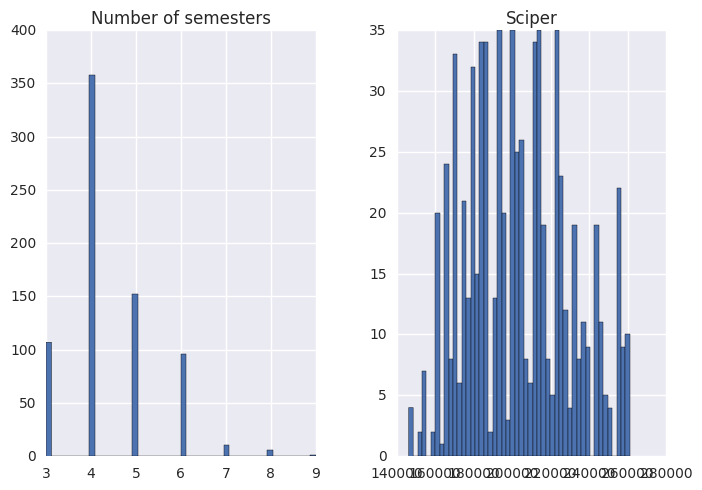

In [318]:
import matplotlib.pyplot as plt
master_semesters.hist(bins=50)
plt.show()

In [319]:
total_mean = master_semesters['Number of semesters'].mean()
alpha = 0.05

for name, counts in master_semesters.groupby('Spécialisation')['Number of semesters']:
    test = stats.ttest_1samp(counts.values, total_mean)
    print("Results for {},".format(name), "the seperate means are :", counts.mean(), " and ", total_mean)
    print("Number of values :", len(counts.values))
    pvalue = test.pvalue
    
    if np.isnan(pvalue):
        print("not enough values to give a significant result")
    else:    
        print("Test p-value = %f" % pvalue)
        print("The means are statistically different") if test.pvalue < alpha else print("The means are statistically equal")
    print("")
        
        

Results for Biocomputing, the seperate means are : 5.66666666667  and  4.40902872777
Number of values : 3
Test p-value = 0.289958
The means are statistically equal

Results for Computer Engineering - SP, the seperate means are : 4.72222222222  and  4.40902872777
Number of values : 18
Test p-value = 0.155851
The means are statistically equal

Results for Computer Science Theory, the seperate means are : 4.0  and  4.40902872777
Number of values : 1
not enough values to give a significant result

Results for Data Analytics, the seperate means are : 4.0  and  4.40902872777
Number of values : 5
Test p-value = 0.000000
The means are statistically different

Results for Foundations of Software, the seperate means are : 4.96428571429  and  4.40902872777
Number of values : 56
Test p-value = 0.000100
The means are statistically different

Results for Information Security - SP, the seperate means are : 4.57142857143  and  4.40902872777
Number of values : 7
Test p-value = 0.675152
The means are st

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


## Bonus: Statistical difference between men and women ?

We separate the data between men and women, computet the means and test if they are statistically different the same way we used for bachelor stduents.

In [320]:
master_semesters
gender_count = master_semesters.groupby('Civilité')['Civilité'].count()
sems_mean = master_semesters.groupby('Civilité')['Number of semesters'].mean()
sems_stats = pd.concat([gender_count,sems_mean], axis=1, keys=['Count','Mean number of semesters'])
sems_stats

,Count,Mean number of semesters
Civilité,,
Madame,101,4.405941
Monsieur,630,4.409524


The means are very close to each other, the following "Two-Sample T-Test" shows it by having a high p-value. Therefore it cannot rejecting the null hyptohesis being that the means are similar.

In [323]:
male_sems_num = master_semesters.query('Civilité == "Monsieur"')['Number of semesters'].values
female_sems_num = master_semesters.query('Civilité == "Madame"')['Number of semesters'].values

alpha = 0.05
test = stats.ttest_ind(male_sems_num, female_sems_num, equal_var=False)

print("p-value = %f" % test.pvalue)
print("statistically " + ("different" if test.pvalue < alpha else "similar"))

p-value = 0.974096
statistically similar


## Plotting

Add last year of Master for each student

In [300]:
last_years = []
for sciper in master_sciper:
    years = master_s1_papp.xs(sciper, level=2).iloc[:1]
    last_year = years.index.get_level_values(0).tolist()[0]
    last_years.append([sciper,last_year])

tmp = pd.DataFrame(last_years, columns=['Sciper', 'Last year'])
master_semesters = master_semesters.merge(tmp, left_on='Sciper', right_on='Sciper')
master_semesters.head()

,Sciper,Civilité,Number of semesters,Mineur,Spécialisation,Last year_x,Last year_y,Last year
0,194836,Madame,4,NaN,aucun,2016-2017,2016-2017,2016-2017
1,254805,Monsieur,4,NaN,aucun,2016-2017,2016-2017,2016-2017
2,201568,Monsieur,4,NaN,aucun,2016-2017,2016-2017,2016-2017
3,248447,Madame,6,NaN,aucun,2016-2017,2016-2017,2016-2017
4,248447,Madame,6,NaN,aucun,2016-2017,2016-2017,2016-2017


In [301]:
master_semesters['Mineur'] = master_semesters['Mineur'].astype('category')
master_semesters['Spécialisation'] = master_semesters['Spécialisation'].astype('category')

Group students by their last year

In [302]:
master_years = master_semesters.groupby(['Last year'])

We plot the repartition of the number of semesters each student has done acording to the year they finished and their mineur/spécialisation

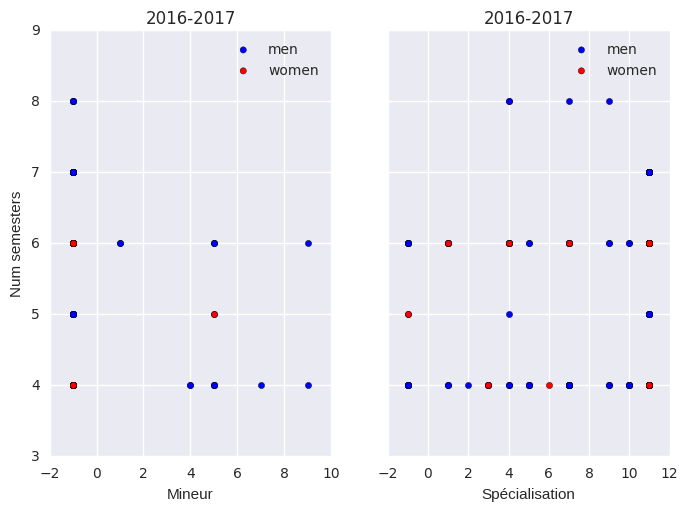

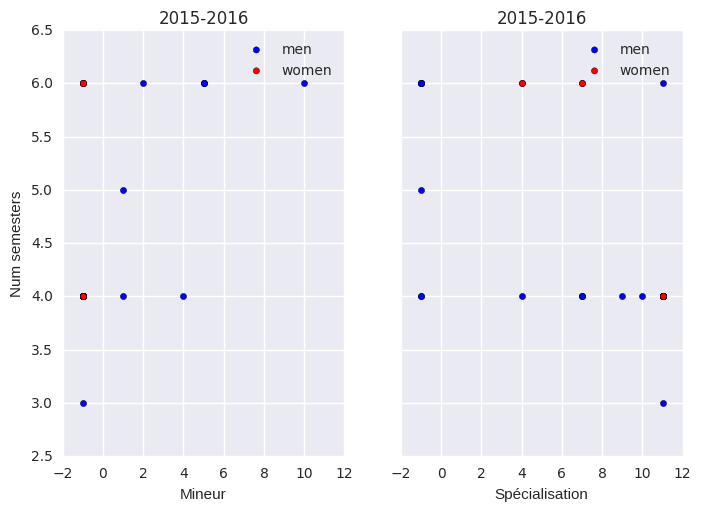

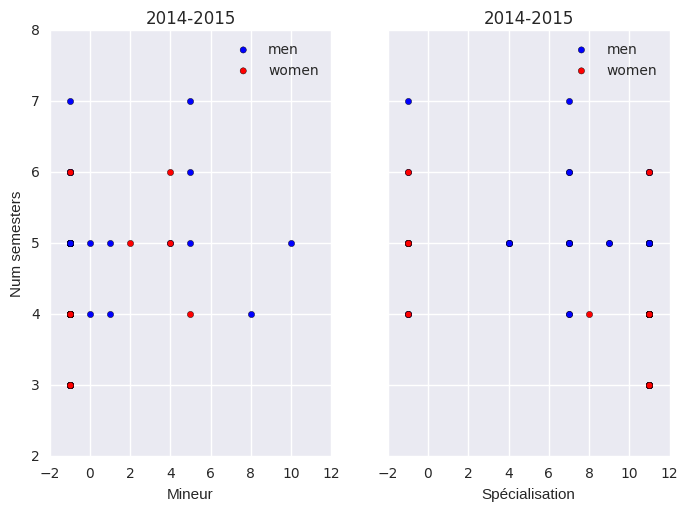

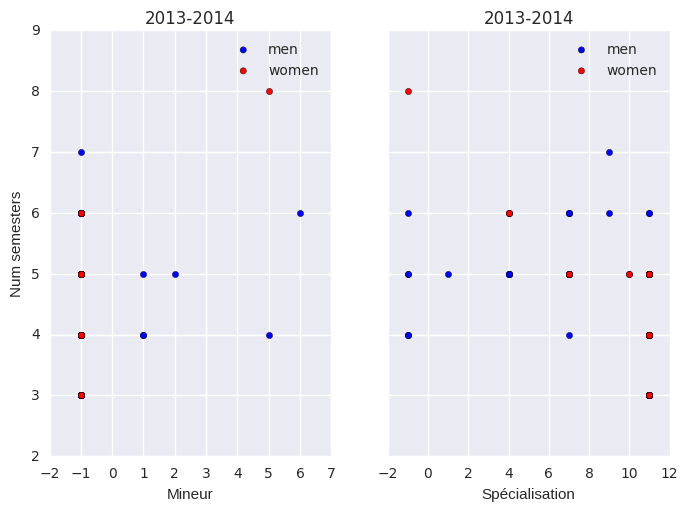

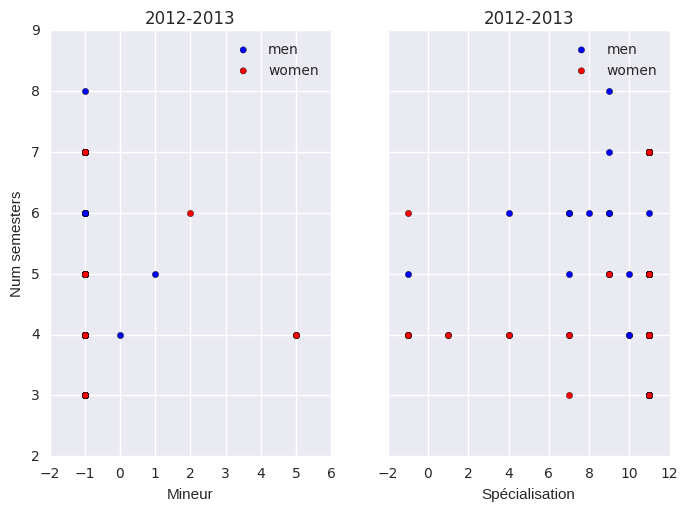

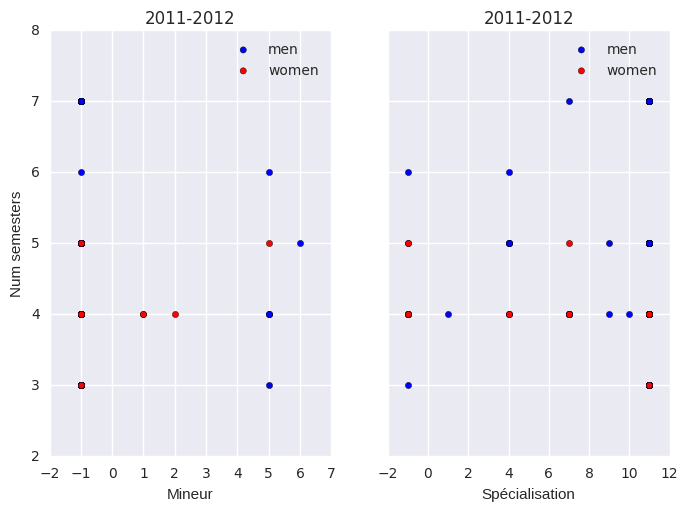

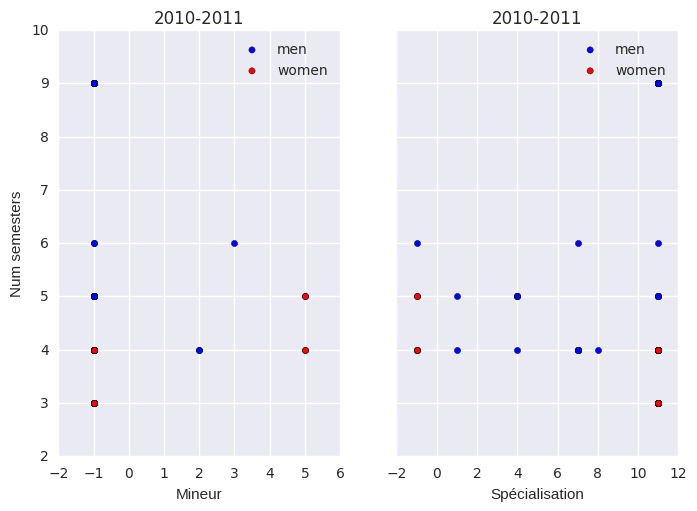

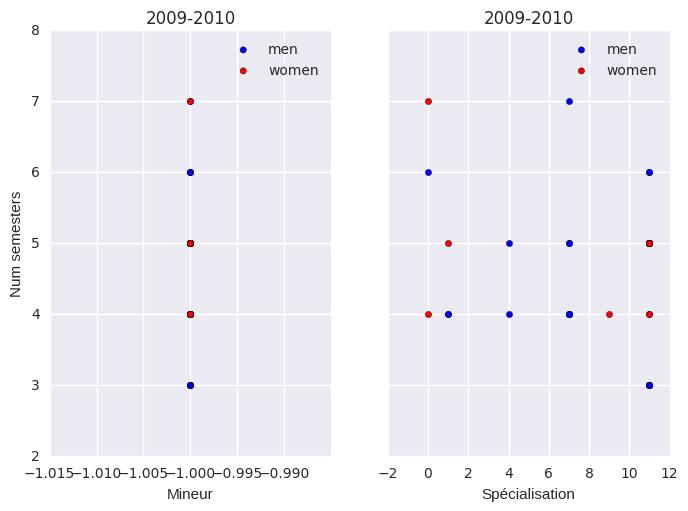

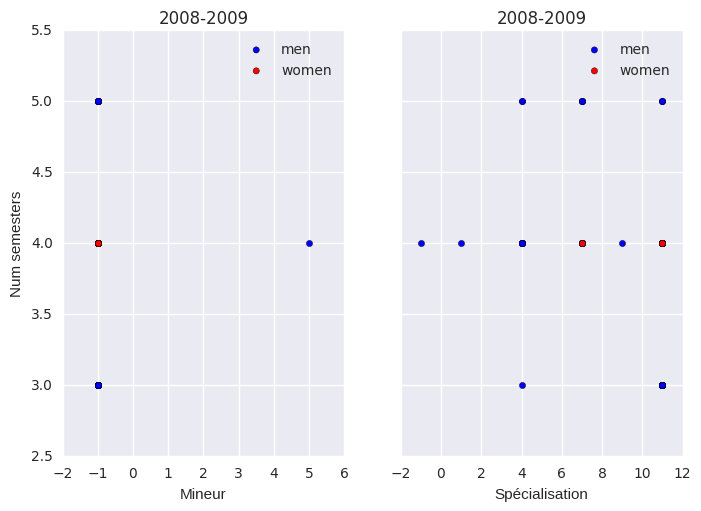

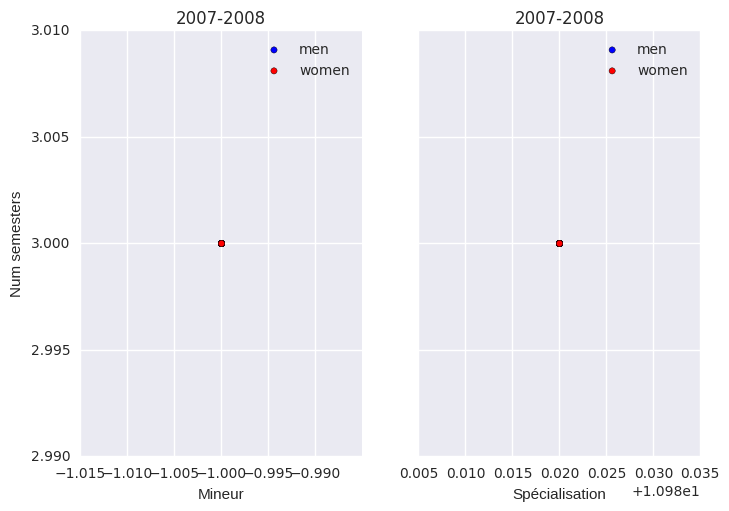

In [326]:
years = master_s1_papp.index.get_level_values(0).drop_duplicates()
for y in years:
    students = master_years.get_group(y)
    
    m = students.query('Civilité == "Monsieur"')[['Sciper', 'Number of semesters', 'Mineur', 'Spécialisation']]
    f = students.query('Civilité == "Madame"')[['Number of semesters', 'Mineur', 'Spécialisation']]
    
    m_sems = m['Number of semesters'].values
    f_sems = f['Number of semesters'].values
    
    m_mineur = m['Mineur'].cat.codes
    f_mineur = f['Mineur'].cat.codes
    
    m_spe = m['Spécialisation'].cat.codes
    f_spe = f['Spécialisation'].cat.codes
    
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.set_title(y)
    ax1.scatter(m_mineur, m_sems, c='blue', label='men')
    ax1.scatter(f_mineur, f_sems, c='red', label='women')
    ax1.set_xlabel('Mineur')
    ax1.set_ylabel('Num semesters')
    ax1.legend(loc='best')
    
    ax2.set_title(y)
    ax2.scatter(m_spe, m_sems, c='blue', label='men')
    ax2.scatter(f_spe, f_sems, c='red', label='women')
    ax2.set_xlabel('Spécialisation')
    ax2.legend(loc='best')
    
    